# 사업 보고서 - V. 이사의 경영진단 및 분석
1. 예측정보에 대한 주의사항
2. 개요
3. 재무상태 및 영업실적
가. 재무상태표(요약 재무상태표), 주요비율
나. 영업실적(요약손익계산서), 주요비율
4. 유동성 및 자금조달과 지출: 한줄 설명+표
5. 부외거래
6. 그 밖에 투자의사결정에 필요한 사항

In [2]:
##  프로세스바
import sys
def progressBar(value, endvalue, bar_length=20):
    percent = float(value) / endvalue
    arrow = '-' * int(round(percent * bar_length)-1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write("\rPercent: [{0}] {1}%".format(arrow + spaces, int(round(percent * 100))))
    sys.stdout.flush()

In [3]:
import pandas as pd
txt = pd.read_csv("dart_text.csv", encoding = 'UTF-8')
txt.head()

,회사명,접수번호,텍스트
0,엘에이티,20190102000129,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
1,대원모방,20181228000183,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
2,지놈앤컴퍼니,20181231000061,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
3,테크엔,20181224000149,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."
4,프로테옴텍,20181226000186,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T..."


### 텍스트 전처리

In [103]:
temp = txt["텍스트"]
temp[84]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\r\n<HTML style=\'border:0\'>\r\r\n<HEAD>\r\r\n<TITLE></TITLE>\r\r\n<meta http-equiv="X-UA-Compatible" content="IE=EmulateIE8" >\r\r\n<meta http-equiv="X-UA-TextLayoutMetrics" content="gdi" >\r\r\n<META http-equiv="Content-Type" content="text/html; charset=utf-8">\r\r\n<link rel="stylesheet" type="text/css" href="/css/report_xml.css">\r\r\n</HEAD>\r\r\n<BODY bgcolor="#FFFFFF">\r\r\n<P><BR/></P>\r\r\n<P class=\'section-1\'><A name=\'toc1\'>V. 이사의 경영진단 및 분석의견</A></P>\r\r\n<P><BR/><SPAN style=\'font-weight:bold;\'>가. 예측정보에 대한 주의사항<BR/></SPAN><BR/>당사는 2017년 01월 01일부터 2017년 12월 31일까지 사업년도의 회계 및 업무에 관한 이사의 경영진단 및 분석의견을 아래와 같이 보고합니다.<BR/><BR/>본 \'이사의 경영진단 및 분석의견\'에는 주식회사 에코마이스터의 과거 경영실적 뿐 아니라 현재의 재무 및 영업 상황에 대한 평가, 경제 및 관련산업 전망, 향후 영업실적 및 사업 목표 등의 미래지향적인 내용이 포함되어 있습니다. 본 자료에 포함된 예측정보는 내부적인 사업환경 분석 및 시장 전망에 기초한 자료로서 예측 불가능한 요인들로 인해 변동될 수 있는 불확실성을 포함하고 있습니다. 따라서, 이러한 불확실성으로 인해 본 자료에 서술된 예측정보

In [6]:
from nltk.tokenize import sent_tokenize
import re
import datetime

In [154]:
start = datetime.datetime.now()
processed_text = []
for tmp in temp:
    sent_text = sent_tokenize(tmp) # 문장단위 토큰화
    for text_idx in range(0,len(sent_text)):
        if '이사의 경영진단 및 분석의견' in sent_text[text_idx]: #토큰화했을 때 '이사의 경영진단 및 분석의견'이 포함된 텍스트 이후로 가져옴
            sent_text = sent_text[text_idx+1:]
            break
    ## 텍스트 전처리(올바르게 단어수를 세기 위해 가능한 숫자와 의미있는 영어문자는 제거하지 않음)
    sent_text = [re.sub("\r",' ',text) for text in sent_text]
    sent_text = [re.sub("\n",' ',text) for text in sent_text]
    sent_text = [re.sub("<.{1,}>",' ',text) for text in sent_text]
    sent_text = [re.sub(" .\.",' ',text) for text in sent_text]
    sent_text = [re.sub("\d+[\.\,]\d*[\.\,]*\d*",'숫자 ',text) for text in sent_text]
    sent_text = [re.sub("&amp;",'앤',text) for text in sent_text]
    sent_text = [re.sub("&nbsp;",' ',text) for text in sent_text]
    sent_text = [re.sub("\.",' ',text) for text in sent_text]
    sent_text = [re.sub('[ⅢXI,;\(\)%\'\"」』『:\“\”ㆍ-]',' ',text) for text in sent_text]
    sent_text = [re.sub("  +",' ',text) for text in sent_text]
    sent_text = [' '.join(sent_text)] # 토큰화된 텍스트들의 리스트를 다 붙임(대신 문장 구분이 없어짐)
    processed_text.append(sent_text) # 각 사업보고서들의 텍스트를 리스트로 받아서 넣음
    
    progressBar(len(processed_text),len(temp))
    
end = datetime.datetime.now()
print("\n걸린시간 : ",end-start)

Percent: [------------------->] 100%
걸린시간 :  0:05:05.095369


In [156]:
len(processed_text) # 총 사업보고서 수

12820

In [155]:
processed_text[10] # sample 사업보고서 text

['예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동 사건 또는 현상은 당해 공시서류 작성시점의 사건 및 재무성과에 대하여 회사의 견해를 반영한 것입니다 동 예측정보는 미래 사업환경과 관련된 다양한 가정에 기초하고 있으며 동 가정들은결과적으로 부정확한 것으로 판명될 수도 있습니다  또한 이러한 가정 들에는 예측정보에서 기재한 예상치와 실제 결과 간에 중요한 차이를 초래할 수 있는 위험 불확실성 및 기타 요인을 포함하고 있습니다  이러한 중요한 차이를 초래할 수 있는 요인에는 회사 내부경영과 관련된 요인과 외부환경에 관한 요인이 포함되어 있으며 이에한하지 않습니다 당사는 동 예측정보 작성시점 이후에 발생하는 위험 또는 불확실성을 반영하기 위하여 예측정보에 기재한 사항을 수정하는 정정보고서를 공시할 의무가 없습니다   결론적으로 동 사업보고서상에 회사가 예상한 결과 또는 사항이 실현되거나 회사가 당초에 예상한 영향이 발생한다는 확신을 제공할 수 없습니다  동 보고서에 기재된 예측정보는 동 보고서 작성시점을 기준으로 작성한 것이며 회사가 이러한 위험요인이나 예측정보를 업데이트할 예정이 없음에 유의하시기 바랍니다  개요 당사는 1997년 11월 3일에 설립하여 2006년부터 본격적으로 LED 조명 등 전기전자통신부품의 제조 및 판매를 주요 사업으로 영위하고 있습니다  2017년에 전년 대비 약 64 의 매출액 성장률을 시현하며 크게 성장하였습니다  이러한 성장은 LED 조명 관련 기술개발을 통한 특허 및 우수 제품 인증 사업 실적이 축적됨에 따른 것으로 영업이익과 당기순이익은 각각 약 11억원 약 8억원을 기록하였습니다   당사의 경영에 대한 전반적인 사항을 파악하기 위하여 장부와 관계서류를 열람하고 재무제표 및 부속명세서에 대하여도 면밀히 검토하였습니다  경영활동에 중대한 영향을 미칠 수 있는 사항에 대하여는 그 내용을 면밀히 검토하는 등 적정한 방법으로 회사경영에 대한 내용을 진단하였습니다  재무상태 및 영업실적  재무상태표 요약

### 1) 단어수

In [157]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [158]:
start = datetime.datetime.now()

word_cnt, txt_token = [], []
for tmp in processed_text:
    ## word_tokenize는 space, punctuation기준으로 나눔, 위에서 구두점을 제거하였으므로 공백 기준으로 나눔 즉, 단어들로 나눔
    text_token = [word_tokenize(text) for text in tmp]
    text_token = [y for x in text_token for y in x]
    txt_token.append(text_token)
    word_cnt.append(len(text_token)) # 단어들로 나뉜 토큰들의 길이 즉, 단어수
    
    progressBar(len(word_cnt),len(processed_text))
    
end = datetime.datetime.now()
print("\n걸린시간 : ",end-start)

Percent: [------------------->] 100%
걸린시간 :  0:01:05.324815


In [159]:
print(len(word_cnt))
word_cnt[12815:]

12820


[1185, 1321, 1215, 5, 113]

In [168]:
txt_token[3]

['예측정보에',
 '대한',
 '주의사항',
 '당사가',
 '동',
 '사업보고서에서',
 '미래에',
 '발생할',
 '것으로',
 '전망한',
 '활동',
 '사건',
 '또는',
 '현상은',
 '당해',
 '공시서류',
 '작성시점의',
 '사건',
 '및',
 '재무성과에',
 '대하여',
 '회사의',
 '견해를',
 '반영한',
 '것입니다',
 '동',
 '예측정보는',
 '미래',
 '사업환경과',
 '관련된',
 '다양한',
 '가정에',
 '기초하고',
 '있으며',
 '동',
 '가정들은결과적으로',
 '부정확한',
 '것으로',
 '판명될',
 '수도',
 '있습니다',
 '또한',
 '이러한',
 '가정',
 '들에는',
 '예측정보에서',
 '기재한',
 '예상치와',
 '실제',
 '결과',
 '간에',
 '중요한',
 '차이를',
 '초래할',
 '수',
 '있는',
 '위험',
 '불확실성',
 '및',
 '기타',
 '요인을',
 '포함하고',
 '있습니다',
 '이러한',
 '중요한',
 '차이를',
 '초래할',
 '수',
 '있는',
 '요인에는',
 '회사',
 '내부경영과',
 '관련된',
 '요인과',
 '외부환경에',
 '관한',
 '요인이',
 '포함되어',
 '있으며',
 '이에한하지',
 '않습니다',
 '당사는',
 '동',
 '예측정보',
 '작성시점',
 '이후에',
 '발생하는',
 '위험',
 '또는',
 '불확실성을',
 '반영하기',
 '위하여',
 '예측정보에',
 '기재한',
 '사항을',
 '수정하는',
 '정정보고서를',
 '공시할',
 '의무가',
 '없습니다',
 '결론적으로',
 '동',
 '사업보고서상에',
 '회사가',
 '예상한',
 '결과',
 '또는',
 '사항이',
 '실현되거나',
 '회사가',
 '당초에',
 '예상한',
 '영향이',
 '발생한다는',
 '확신을',
 '제공할',
 '수',
 '없습니다',
 '동',
 '보고서에',
 '기재된',
 '예측정보는',


In [161]:
from pandas import Series, DataFrame
df1 = DataFrame(txt['회사명'])
df1.columns = ['회사명']
df2 = DataFrame(txt['접수번호'])
df2.columns = ['접수번호']
df2 = df2.astype('str')
df = DataFrame(word_cnt)
df.columns = ["단어수"]
df3 = DataFrame(processed_text)
df3.columns = ["텍스트"]
df3[:5]

,텍스트
0,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...
1,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...
2,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...
3,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...
4,기타 재무에 관한 사항


In [163]:
print(len(df),len(df1),len(df2),len(df3))

12820 12820 12820 12820


In [174]:
'''data = pd.concat([df1,df2,df3,df], axis=1)

writer = pd.ExcelWriter('./dart_text_wordcnt.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()

data.head()'''

,회사명,접수번호,텍스트,단어수
0,엘에이티,20190102000129,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...,342
1,대원모방,20181228000183,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...,375
2,지놈앤컴퍼니,20181231000061,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...,177
3,테크엔,20181224000149,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...,351
4,프로테옴텍,20181226000186,기타 재무에 관한 사항,4


### 2) 긍부정 단어 수
#### 1. 긍부정 단어 받기

In [178]:
import re
from konlpy.tag import Twitter
import nltk
tagger = Twitter() # Twitter 태깅 함수
def tokenize(doc) : # 형태소 분석 함수, 여기선 사용하지 않음
    return ['/'.join(t) for t in tagger.pos(doc, norm = True, stem = True)]

In [170]:
f = open("pos_pol_word.txt", 'r', encoding = 'UTF-8') # knu의 긍정 사전
pos = f.read()
f.close()

In [171]:
pos_dic = pos.split('\n') # 사전을 단어들의 리스트로 만듦
pos_dic[0] = re.sub("\ufeff",'',pos_dic[0])
print(pos_dic)

['가격이 싸다', '가까이 사귀어', '가까이하다', '가다듬어', '가다듬어 수습하는', '가다듬어 수습하다', '가다듬어 정하다', '가당히', '가뜬하게', '가라앉혀 바로잡다', '가르치며', '가르침', '가벼운 마음으로', '가볍게 웃다', '가볍고', '가볍고 보드랍게', '가분가분', '가분히', '가뿐가뿐', '가뿐가뿐하다', '가뿐가뿐히', '가뿐하게', '가뿐하다', '가뿐한', '가뿐한 느낌', '가뿐한 느낌이', '가뿐히', '가장 중요한', '가지런하게 하는', '가지런하게 하다', '가지런하다', '가치', '가치가', '가치있는', '각별나다', '각별하다', '간직하다', '감각적이다', '감당하다', '감동시킬', '감동시킬 만한', '감모', '감싸고', '감정이 북받쳐', '강렬하게', '강세', '강인하다', '강하게', '강하게 하다', '강하고', '강하다', '강화하다', '갖추다', '개선하고', '개성', '개성있는', '개성있다', '갠소', '갸륵한', '갸륵한 데가', '갸름하다', '거리낌 없이', '거짓 없다', '거짓없다', '거침없이', '거침이 없는', '걱정이 없는', '건강에 긍정적인', '건둥건둥', '건둥건둥하다', '검소하다', '겉면이 매끄럽고', '겉모양의 아름다움과', '격려되다', '격려하다', '격식에 맞아', '견고하다', '견디어 내다', '견줄 수 없을 정도로', '결점이 없도록', '겸손하게', '겸손하게 이르는', '겸손하고', '경건한', '경험이 많고', '고상하고', '고상한 남자', '고상한 이야기', '고요하게', '고요하게 함', '고요하고', '고요함', '고요해짐', '고쳐', '고쳐 세우다', '고쳐 지음', '고쳐 짓다', '고치다', '곧게', '곧게 되다', '곧고', '곧고 올바름', '곧다', '곧장 나아가다', '곳에서 평안히', '공덕이 있는', '공로에', '공로와', '공로와 업적', '공손하다', '공정한', '공평하다', '공평하여', 

In [172]:
f = open("neg_pol_word.txt", 'r', encoding = 'UTF-8')
neg = f.read()
f.close()

In [173]:
neg_dic = neg.split('\n')
neg_dic[0] = re.sub("\ufeff",'',neg_dic[0])
neg_dic

['가난',
 '가난뱅이',
 '가난살이',
 '가난살이하다',
 '가난설음',
 '가난에',
 '가난에 쪼들려서',
 '가난하게',
 '가난하고',
 '가난하고 어렵다',
 '가난하고 천한',
 '가난하다',
 '가난하여',
 '가난한',
 '가난한 데다가',
 '가난한 사람을',
 '가난히',
 '가년스럽다',
 '가녕스럽다',
 '가누지 못하고',
 '가누지 못하다',
 '가누지 못할',
 '가누지 못할 정도로',
 '가누지 못함',
 '가눌 수 없게',
 '가눌 수 없을',
 '가눌 수 없이',
 '가당찮다',
 '가당찮이',
 '가두거나 해치거나',
 '가망이 없게',
 '가슴 아파하다',
 '가슴 아파함',
 '가슴 아프게',
 '가슴 아프고',
 '가슴 아프다',
 '가슴속에 근심이나',
 '가슴앓이',
 '가슴앓이하다',
 '가슴이 갑갑할',
 '가슴이 괴롭거나',
 '가슴이 그득한',
 '가슴이 답답하고',
 '가슴이 답답하다',
 '가슴이 답답하며',
 '가슴이 아프다',
 '가슴이 아픈',
 '가슴이 울렁거리는',
 '가슴이 울렁거리다',
 '가슴이 찢어질',
 '가엾고 불쌍하다',
 '가엾고 불쌍하여',
 '가엾고 불쌍한',
 '가엾고 불쌍함',
 '가엾고 애처롭다',
 '가음 아프고',
 '가짜',
 '가치 없는',
 '가치가 없다',
 '가치가 없을',
 '가치가 없이',
 '가치없는',
 '가혹하게',
 '가혹하게 착취하여',
 '간 장애',
 '간사한 짓을',
 '감금하여',
 '감정의 불화',
 '강간죄',
 '강개무량',
 '강개무량하다',
 '강제로 누르다',
 '강제로 누름',
 '강제로 빼앗아',
 '강제적으로',
 '강탈',
 '강탈하다',
 '강한 비판이나',
 '개짓하다',
 '거만스럽게',
 '거만을',
 '거만을 떠는',
 '거만을 떨다',
 '거만하게',
 '거만하게 행동하는',
 '거만하게 행동하다',
 '거만하고',
 '거만하다',
 '거만한 태도로',
 '거부감',
 '거부하거나',
 '거북스럽게',
 '거

#### 2. 사업보고서에서 명사 추출

In [194]:
### 해당 사업보고서의 텍스트의 명사를 추출해냄 (긍부정 사전에서 추출된 명사와 비교하기 위함)
start = datetime.datetime.now()

text_tag, text_token = [], []
for tmp in processed_text:
    text_token = tagger.nouns(tmp[0])
    text_tag.append(text_token)
    
    progressBar(len(text_tag),len(processed_text))
    
end = datetime.datetime.now()
print("\n걸린시간 : ",end-start)

Percent: [------------------->] 100%
걸린시간 :  0:29:34.278397


In [198]:
text_tag[0]

['예측',
 '정보',
 '대한',
 '주의',
 '사항',
 '당사',
 '사업',
 '보고서',
 '미래',
 '발생',
 '것',
 '전망',
 '활동',
 '사건',
 '현상',
 '공시',
 '서류',
 '시점',
 '사건',
 '및',
 '재무',
 '성과',
 '대하',
 '회사',
 '견해',
 '반영',
 '것',
 '예측',
 '정보',
 '미래',
 '사업',
 '환경',
 '관련',
 '가정',
 '기초',
 '가정',
 '결과',
 '부',
 '것',
 '판명',
 '수도',
 '또한',
 '가정',
 '예측',
 '정보',
 '기재',
 '상치',
 '실제',
 '결과',
 '간',
 '차이',
 '초래',
 '수',
 '위험',
 '불확실',
 '및',
 '기타',
 '요인',
 '포함',
 '차이',
 '초래',
 '수',
 '요인',
 '회사',
 '내부',
 '경영',
 '관련',
 '요인',
 '외부',
 '환경',
 '관',
 '요인',
 '포함',
 '이',
 '당사',
 '예측',
 '정보',
 '작성',
 '시점',
 '이후',
 '발생',
 '위험',
 '불확실',
 '반영',
 '위',
 '예측',
 '정보',
 '기재',
 '사항',
 '수정',
 '정정',
 '보고서',
 '공시',
 '의무',
 '결론',
 '사업',
 '보고서',
 '회사',
 '예상',
 '결과',
 '사항',
 '실현',
 '회사',
 '당초',
 '예상',
 '영향',
 '발생',
 '확신',
 '제공',
 '수',
 '보고서',
 '기재',
 '예측',
 '정보',
 '보고서',
 '시점',
 '기준',
 '작성',
 '것',
 '회사',
 '위험',
 '요인',
 '예측',
 '정보',
 '업데이트',
 '예정',
 '음',
 '유의',
 '개요',
 '당사',
 '설립',
 '반도체',
 '디스플레이',
 '신재생에너지',
 '분야',
 '사용',
 '진공',
 '공정',
 '장비',
 '모듈',
 '및',
 '검사',
 '장비'

In [200]:
f = open('text_tag.txt', 'w')
for text_idx in text_tag:
    f.write(' '.join(text_idx))
f.close()

In [201]:
len(text_tag)

12820

In [202]:
text_list = []
for tmp in text_tag: 
    tmp2 = nltk.Text(tmp)
    text_list.append(tmp2)

In [203]:
text_list[:3]

[<Text: 예측 정보 대한 주의 사항 당사 사업 보고서...>,
 <Text: 예측 정보 대한 주의 사항 당사 사업 보고서...>,
 <Text: 예측 정보 대한 주의 사항 당사 사업 보고서...>]

In [204]:
# 불용어(조사 등)
text_vocab, text_ko = [], []
stop_words = ['사항','제기','및','년','사업','관','그','등','것','및','부','수','위','나','대하']
for tmp in text_list:    
    ko = [word for word in tmp if word not in stop_words] # 불용어 제거
    ko = nltk.Text(ko) # 텍스트의 단어들만 가져옴
    text_ko.append(ko) 
    text_vocab.append(ko.vocab()) 

In [205]:
text_ko[:5]

[<Text: 예측 정보 대한 주의 당사 보고서 미래 발생...>,
 <Text: 예측 정보 대한 주의 당사 보고서 미래 발생...>,
 <Text: 예측 정보 대한 주의 당사 보고서 미래 발생...>,
 <Text: 예측 정보 대한 주의 당사 보고서 미래 발생...>,
 <Text: 기타 재무...>]

In [206]:
text_vocab[:5]

[FreqDist({'예측': 7, '정보': 7, '회사': 7, '당사': 6, '보고서': 5, '관련': 5, '요인': 5, '장비': 5, '환경': 4, '제품': 4, ...}),
 FreqDist({'정보': 10, '당사': 9, '예측': 8, '감사': 8, '보고서': 7, '외부': 6, '업종': 6, '매출': 6, '회사': 5, '평균': 5, ...}),
 FreqDist({'예측': 8, '정보': 8, '보고서': 6, '회사': 5, '요인': 5, '재무': 4, '당사': 3, '발생': 3, '예상': 3, '시점': 3, ...}),
 FreqDist({'예측': 7, '정보': 7, '당사': 6, '회사': 6, '관련': 6, '보고서': 5, '요인': 5, '내용': 5, '환경': 4, '정책': 4, ...}),
 FreqDist({'기타': 1, '재무': 1})]

In [208]:
doc_words = [list(ko) for ko in text_ko]
doc_words[:2]

[['예측',
  '정보',
  '대한',
  '주의',
  '당사',
  '보고서',
  '미래',
  '발생',
  '전망',
  '활동',
  '사건',
  '현상',
  '공시',
  '서류',
  '시점',
  '사건',
  '재무',
  '성과',
  '회사',
  '견해',
  '반영',
  '예측',
  '정보',
  '미래',
  '환경',
  '관련',
  '가정',
  '기초',
  '가정',
  '결과',
  '판명',
  '수도',
  '또한',
  '가정',
  '예측',
  '정보',
  '기재',
  '상치',
  '실제',
  '결과',
  '간',
  '차이',
  '초래',
  '위험',
  '불확실',
  '기타',
  '요인',
  '포함',
  '차이',
  '초래',
  '요인',
  '회사',
  '내부',
  '경영',
  '관련',
  '요인',
  '외부',
  '환경',
  '요인',
  '포함',
  '이',
  '당사',
  '예측',
  '정보',
  '작성',
  '시점',
  '이후',
  '발생',
  '위험',
  '불확실',
  '반영',
  '예측',
  '정보',
  '기재',
  '수정',
  '정정',
  '보고서',
  '공시',
  '의무',
  '결론',
  '보고서',
  '회사',
  '예상',
  '결과',
  '실현',
  '회사',
  '당초',
  '예상',
  '영향',
  '발생',
  '확신',
  '제공',
  '보고서',
  '기재',
  '예측',
  '정보',
  '보고서',
  '시점',
  '기준',
  '작성',
  '회사',
  '위험',
  '요인',
  '예측',
  '정보',
  '업데이트',
  '예정',
  '음',
  '유의',
  '개요',
  '당사',
  '설립',
  '반도체',
  '디스플레이',
  '신재생에너지',
  '분야',
  '사용',
  '진공',
  '공정',
  '장비',
  '모듈',
  '검사',
  '장비',
  

#### 3. 긍정 사전으로부터 명사 추출 후 텍스트에 포함된 긍정단어수 세기

In [209]:
# 긍정 사전
pos_words = [tagger.nouns(doc) for doc in pos_dic if len(tagger.nouns(doc))!=0] #긍정사전의 단어들로부터 명사 추출, 명사 없으면 스킵
pos_words = [re.findall(r'[가-힣]{2,10}', word) for y in pos_words for word in y] #추출된 명사들 중 2음절 이상인 명사만 추출
pos_words = [y for x in pos_words for y in x] #unlist
pos_words = set(pos_words) # 세트 형 구조로 만듦(중복되지 않게)
pos_words = [word for word in pos_words if word not in stop_words] # 불용어 없애고 리스트로 만듦
pos_words

['수익',
 '화미',
 '비중',
 '참회',
 '득템',
 '기준',
 '주선',
 '안심',
 '친애롭다',
 '유요',
 '어울림',
 '무궁무진',
 '트렌디',
 '흐트러짐',
 '만하',
 '실제',
 '반듯이',
 '쓸모',
 '성풍',
 '왕성',
 '결과',
 '아무',
 '찬사',
 '밀고',
 '소질',
 '애처',
 '눈매',
 '극복',
 '박하',
 '증상',
 '홀리',
 '감동',
 '끈기',
 '정이',
 '창조',
 '소득',
 '비장',
 '기회',
 '입가',
 '자꾸',
 '통달',
 '인정이',
 '칭송',
 '자태',
 '인심',
 '부처',
 '흥행',
 '히쭉',
 '공적',
 '소담',
 '정조',
 '개선',
 '정연',
 '진리',
 '긍정',
 '관상',
 '장애물',
 '혁신',
 '참다운',
 '순결',
 '기반',
 '차도남',
 '아픔',
 '부담',
 '정치',
 '치료',
 '로움',
 '성적',
 '압도',
 '감정',
 '기억',
 '자세',
 '방긋',
 '덕택',
 '성향',
 '사이',
 '품격',
 '진국',
 '아량',
 '증득',
 '흠집',
 '거리',
 '출하',
 '걱정',
 '사람',
 '사건',
 '의롭다',
 '사심',
 '천사',
 '각별',
 '명복',
 '평화로움',
 '보송보송',
 '주장',
 '구함',
 '그윽',
 '강조',
 '자원',
 '흠애',
 '허물',
 '매력',
 '엄하',
 '재주',
 '버젓',
 '어진',
 '긴장',
 '부여',
 '갠소',
 '격려',
 '최고',
 '살림',
 '곧장',
 '조화로움',
 '추진',
 '행복',
 '스스럼',
 '가까이',
 '괴로움',
 '또박또박',
 '분위기',
 '공기',
 '헤프',
 '요구',
 '고결',
 '영웅',
 '영특',
 '품질',
 '황송',
 '생혈',
 '최적',
 '저쪽',
 '상승',
 '더욱',
 '용모',
 '교양',
 '즐거움',
 '선선',
 '집안',
 '문학',


In [ ]:
w1 = ['성격','성장','작위']
w2 = ['매출','액','성장','률']
sum([word in w2 for word in w1])

In [211]:
###### 오래걸림 !!! #############################
start = datetime.datetime.now()

pos_words_cnt, cnt = [], 0
for ko in text_ko:
    cnt = sum([word in ko for word in pos_words]) # 각 긍정단어가 사업보고서 텍스트의 단어들에 있는지 논리값을 가져오고 개수 세기
    pos_words_cnt.append(cnt)

    progressBar(len(pos_words_cnt),len(text_ko))
    
end = datetime.datetime.now()
print("\n걸린시간 : ",end-start)

Percent: [------------------->] 100%
걸린시간 :  0:25:42.687741


In [ ]:
'''pos_words_tmp, pos_words_list,pos_words_cnt = [], [], []
for ko in text_ko[:10]:
    for word in pos_words:
        if (word in ko) == True: pos_words_cnt += 1
    pos_words_cnt.append(len(pos_words_tmp))
    pos_words_list.append(set(pos_words_tmp))
pos_words_list[:5]'''

In [212]:
neg_words = [tagger.nouns(doc) for doc in neg_dic if len(tagger.nouns(doc))!=0]
neg_words = [re.findall(r'[가-힣]{2,10}', word) for y in neg_words for word in y]
neg_words = [y for x in neg_words for y in x]
neg_words = set(neg_words)
neg_words = [word for word in neg_words if word not in stop_words]
neg_words

['흐느껴',
 '뚝뚝',
 '질질',
 '주견',
 '감금',
 '기준',
 '실패',
 '중병',
 '그르',
 '흐트러져',
 '가스',
 '업신여김',
 '아무',
 '지기',
 '임신',
 '고함',
 '욕심꾸러기',
 '분간',
 '가엽다',
 '기회',
 '흘흘',
 '헛되이',
 '편두통',
 '강탈',
 '불능',
 '팔팔',
 '건둥',
 '얻지',
 '지능',
 '자라',
 '종알종알',
 '곧잘',
 '정치',
 '망연자실',
 '용도',
 '사이',
 '도중',
 '스스러움',
 '호들갑',
 '거리',
 '사람',
 '주색',
 '열병',
 '통증',
 '위험',
 '거래',
 '싸가지',
 '부스스',
 '허기',
 '봉변',
 '얌치',
 '표리',
 '불건전',
 '벙청',
 '다가',
 '괴로움',
 '분위기',
 '결석',
 '억지',
 '옆구리',
 '더욱',
 '권세',
 '어색',
 '탐관',
 '멈칫',
 '시창',
 '피꺼솟',
 '마구',
 '강간죄',
 '집도',
 '가치',
 '의존',
 '정처',
 '용납',
 '응어리',
 '당황',
 '흉몽',
 '트롤',
 '자증',
 '윤기',
 '등급',
 '주체',
 '표정',
 '멸치',
 '낙망',
 '제한',
 '사람과',
 '뇌종양',
 '손발',
 '송구',
 '건망증',
 '대목',
 '괴물',
 '쓴웃음',
 '상황',
 '자기',
 '자연',
 '합당',
 '해괴',
 '화가',
 '권태',
 '약간',
 '반신불수',
 '움직',
 '히죽',
 '은근',
 '괴이',
 '얽매',
 '어려움',
 '인망',
 '나불',
 '소원',
 '명예',
 '따돌림',
 '어긋나게',
 '감기',
 '육중',
 '수록',
 '위태',
 '까무러칠',
 '단번',
 '물질대사',
 '편애',
 '위축감',
 '살모넬라균',
 '트리',
 '군색',
 '전부',
 '책임',
 '자유',
 '경망',
 '상대편',
 '매독균',
 '의식',
 '보임',
 '잡지',
 

In [213]:
###### 오래걸림 !!! #############################
start = datetime.datetime.now()

neg_words_cnt, cnt = [], 0
for ko in text_ko:
    cnt = sum([word in ko for word in neg_words])
    neg_words_cnt.append(cnt)

    progressBar(len(neg_words_cnt),len(text_ko))
    
end = datetime.datetime.now()
print("\n걸린시간 : ",end-start)

Percent: [------------------->] 100%
걸린시간 :  0:43:03.840204


In [214]:
pos_words_cnt[:10]

[16, 24, 10, 17, 0, 10, 32, 32, 14, 0]

In [215]:
neg_words_cnt[:10]

[20, 29, 13, 18, 0, 17, 41, 40, 15, 0]

In [216]:
print(len(word_cnt))
print(len(pos_words_cnt))
print(len(neg_words_cnt))

12820
12820
12820


In [217]:
df4 = DataFrame(pos_words_cnt)
df4.columns = ["긍정단어수"]
df5 = DataFrame(neg_words_cnt)
df5.columns = ["부정단어수"]
data = pd.concat([df1,df2,df3,df,df4,df5], axis=1)

writer = pd.ExcelWriter('./dart_text_wordcnt.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()

data.head()

,회사명,접수번호,텍스트,단어수,긍정단어수,부정단어수
0,엘에이티,20190102000129,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...,342,16,20
1,대원모방,20181228000183,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...,375,24,29
2,지놈앤컴퍼니,20181231000061,예측정보에 대한 주의 사항 당사가 동 사업보고서에서 미래에 발생할 것으로 예상 예측...,177,10,13
3,테크엔,20181224000149,예측정보에 대한 주의사항 당사가 동 사업보고서에서 미래에 발생할 것으로 전망한 활동...,351,17,18
4,프로테옴텍,20181226000186,기타 재무에 관한 사항,4,0,0


### 3) 워드크라우드

In [218]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import platform
from konlpy.tag import Twitter
tagger = Twitter()

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [219]:
tokens_ko = tagger.nouns(temp[0])
tokens_ko
ko = nltk.Text(tokens_ko, name = 'text')
ko.vocab()

FreqDist({'사항': 22, '및': 15, '제': 15, '기': 15, '사업': 10, '자산': 9, '관': 8, '매출': 8, '예측': 7, '정보': 7, ...})

In [220]:
stop_words = ['및','제','기','사항','사업','관'] # 의미 없는 단어들
ko = [each_word for each_word in ko if each_word not in stop_words]
ko = nltk.Text(ko, name = 'text')
ko.vocab()

FreqDist({'자산': 9, '매출': 8, '예측': 7, '정보': 7, '당사': 7, '회사': 7, '이익': 7, '제품': 6, '그': 6, '등': 6, ...})

<function matplotlib.pyplot.show(*args, **kw)>

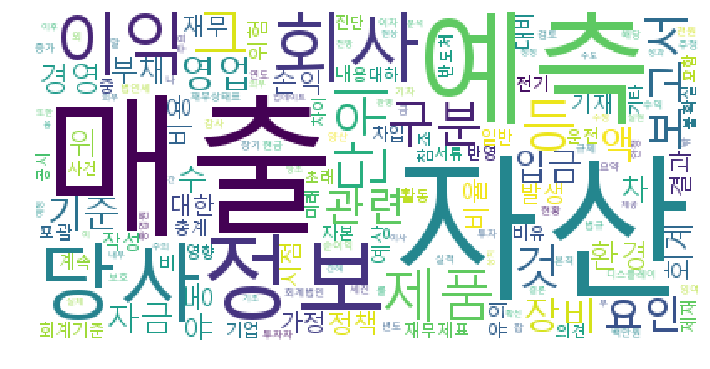

In [221]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show